# Load the libraries

In [63]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Data & First look

In [64]:
# Load the data
df = pd.read_csv("../data/UCI_Credit_Card.csv",index_col = 0)

## About the Data
- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
## About the Variables
There are 25 variables:

- `ID`: ID of each client
- `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- `SEX`: Gender (1=male, 2=female)
- `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
- `AGE`: Age in years
- `PAY_0`: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- `PAY_2`: Repayment status in August, 2005 (scale same as above)
- `PAY_3`: Repayment status in July, 2005 (scale same as above)
- `PAY_4`: Repayment status in June, 2005 (scale same as above)
- `PAY_5`: Repayment status in May, 2005 (scale same as above)
- `PAY_6`: Repayment status in April, 2005 (scale same as above)
- `BILL_AMT1`: Amount of bill statement in September, 2005 (NT dollar)
- `BILL_AMT2`: Amount of bill statement in August, 2005 (NT dollar)
- `BILL_AMT3`: Amount of bill statement in July, 2005 (NT dollar)
- `BILL_AMT4`: Amount of bill statement in June, 2005 (NT dollar)
- `BILL_AMT5`: Amount of bill statement in May, 2005 (NT dollar)
- `BILL_AMT6`: Amount of bill statement in April, 2005 (NT dollar)
- `PAY_AMT1`: Amount of previous payment in September, 2005 (NT dollar)
- `PAY_AMT2`: Amount of previous payment in August, 2005 (NT dollar)
- `PAY_AMT3`: Amount of previous payment in July, 2005 (NT dollar)
- `PAY_AMT4`: Amount of previous payment in June, 2005 (NT dollar)
- `PAY_AMT5`: Amount of previous payment in May, 2005 (NT dollar)
- `PAY_AMT6`: Amount of previous payment in April, 2005 (NT dollar)
- `default.payment.next.month`: Default payment (1=yes, 0=no)

## Rename the column
- I'm not really comfortable with the `PAY_0` then `PAY_2`, so it's better to change the `PAY_0` to `PAY_1`
- Also, the target name is long, so I will make change to that

In [65]:
df.rename(columns= {'PAY_0': 'PAY_1', 'default.payment.next.month' : 'DEFAULT'}, inplace =  True)

In [66]:
print(f"RENAMED COLUMNS: {df.columns}")

RENAMED COLUMNS: Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')


## First look at the data

In [67]:
df.shape

(30000, 24)

- 24 features, and 30000 instances

In [68]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


- We successfully loaded the data !

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AMT4   

- The datatypes are all valid, and actually some categorical features have already been encoded, so we don't have to handle those data later on

In [70]:
df.describe()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


From our initial observations:
- Some `BILL_AMT` attributes include some negative values, which is invalid. We need to examine that later.
- Counts are all equal with the number of instances, signalling that the data has no missing values.
- Early skewness spotted: `AGE` ranges from `21` to `79`, yet the mean is around `35` (Right skewed)

**Update**: Actually the negative values in `BILL_AMT` mean credit/refund, so no problems there

Let's look at the target:

In [71]:
df['DEFAULT'].value_counts()

DEFAULT
0    23364
1     6636
Name: count, dtype: int64

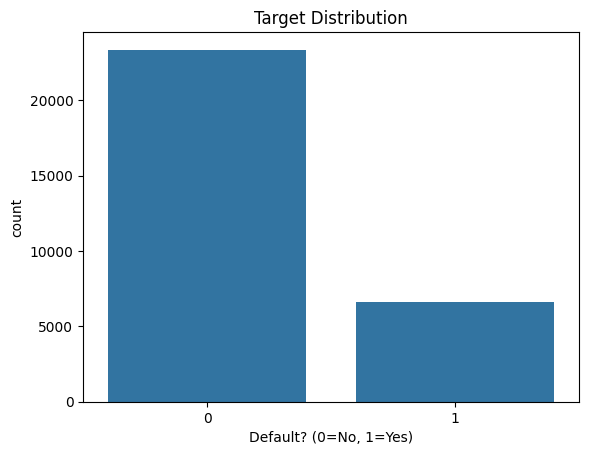

In [72]:
sns.countplot(x='DEFAULT', data=df)
plt.title('Target Distribution')
plt.xlabel('Default? (0=No, 1=Yes)')
plt.show()

-> Data Imbalance

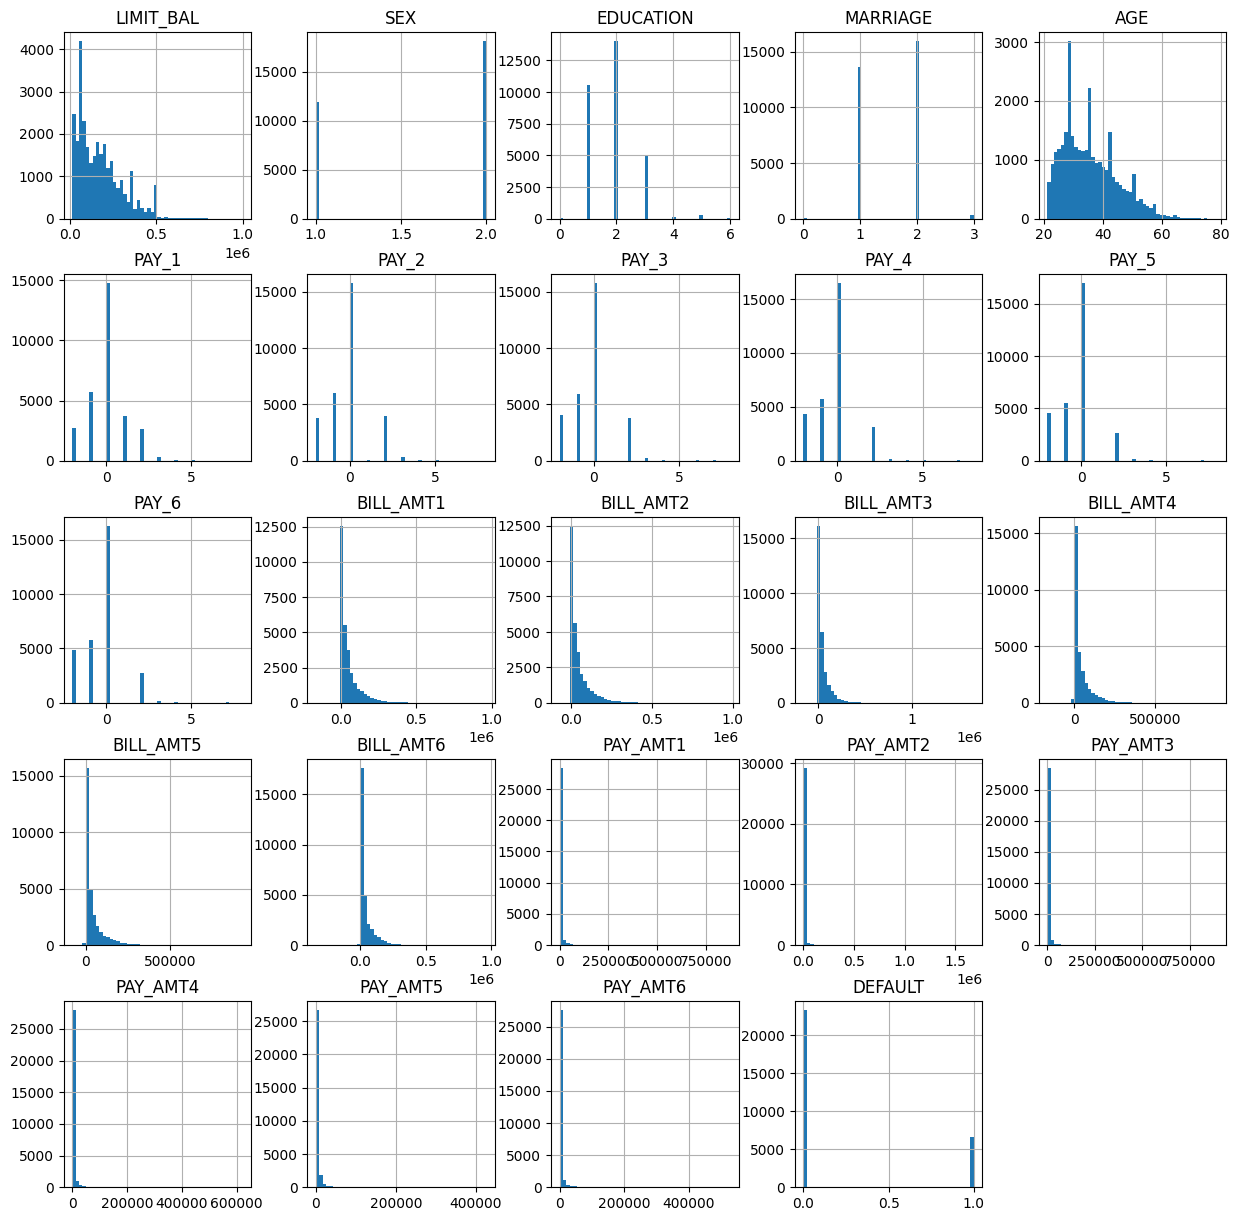

In [73]:
df.hist(bins=50, figsize=(15, 15))
plt.show()

# 2. Clean the data

## 2.1. Handle missing Values

In [74]:
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [75]:
miss_val_tol = df.isna().sum().sum()
print(f'The total number of missing values is: {miss_val_tol}')

The total number of missing values is: 0


- No missing values recorded (Yay!)

It doesn't end there, mate. There are actually some ***Hidden Null***

### Hidden Nulls

From the description, in the `EDUCATION`, the values `5` and `6` actually represent for unknowns. Those are considered NaN values!


## 2.2. Handle Duplicates

In [76]:
df.duplicated().sum()

np.int64(35)

In [77]:
df[df.duplicated() == True]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1981,150000.0,2,1,1,38,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4586,150000.0,2,1,1,31,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6023,210000.0,2,1,2,39,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6467,210000.0,2,2,1,49,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7320,500000.0,1,1,1,43,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8321,360000.0,1,2,1,41,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10251,50000.0,1,2,2,26,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13107,360000.0,2,1,1,49,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14295,20000.0,1,2,2,24,2,2,4,4,4,...,1650.0,1650.0,1650.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [78]:
df.drop_duplicates(inplace = True)
dup_count = df.duplicated().sum()
print(f"Number of duplicates left: {dup_count}")

Number of duplicates left: 0


## 2.3. Categorical Consistency

In [81]:
# Separate out the categorical attribute
# Oftentimes we don't have to do this
categories = ['SEX', 'EDUCATION', 'MARRIAGE'] + [f'PAY_{i}' for i in range(1,7)]
print(f"Categorical attributes of the data: {categories}")

Categorical attributes of the data: ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [86]:
# Cardinality check
for col in categories:
    print(f'======={col}=======')
    print(df[col].value_counts().sort_index())
    print("\n")

=======SEX=======
SEX
1    11874
2    18091
Name: count, dtype: int64


=======EDUCATION=======
EDUCATION
0       14
1    10563
2    14019
3     4915
4      123
5      280
6       51
Name: count, dtype: int64


=======MARRIAGE=======
MARRIAGE
0       54
1    13643
2    15945
3      323
Name: count, dtype: int64


=======PAY_1=======
PAY_1
-2     2750
-1     5682
 0    14737
 1     3667
 2     2666
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64


=======PAY_2=======
PAY_2
-2     3752
-1     6046
 0    15730
 1       28
 2     3926
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: count, dtype: int64


=======PAY_3=======
PAY_3
-2     4055
-1     5934
 0    15764
 1        4
 2     3819
 3      240
 4       75
 5       21
 6       23
 7       27
 8        3
Name: count, dtype: int64


=======PAY_4=======
PAY_4
-2     4318
-1     5683
 0    16455
 1        2
 2     3159
 3      180
 4       68
 5       35
 6   

- Those are hard to see so a better way is through visualizing

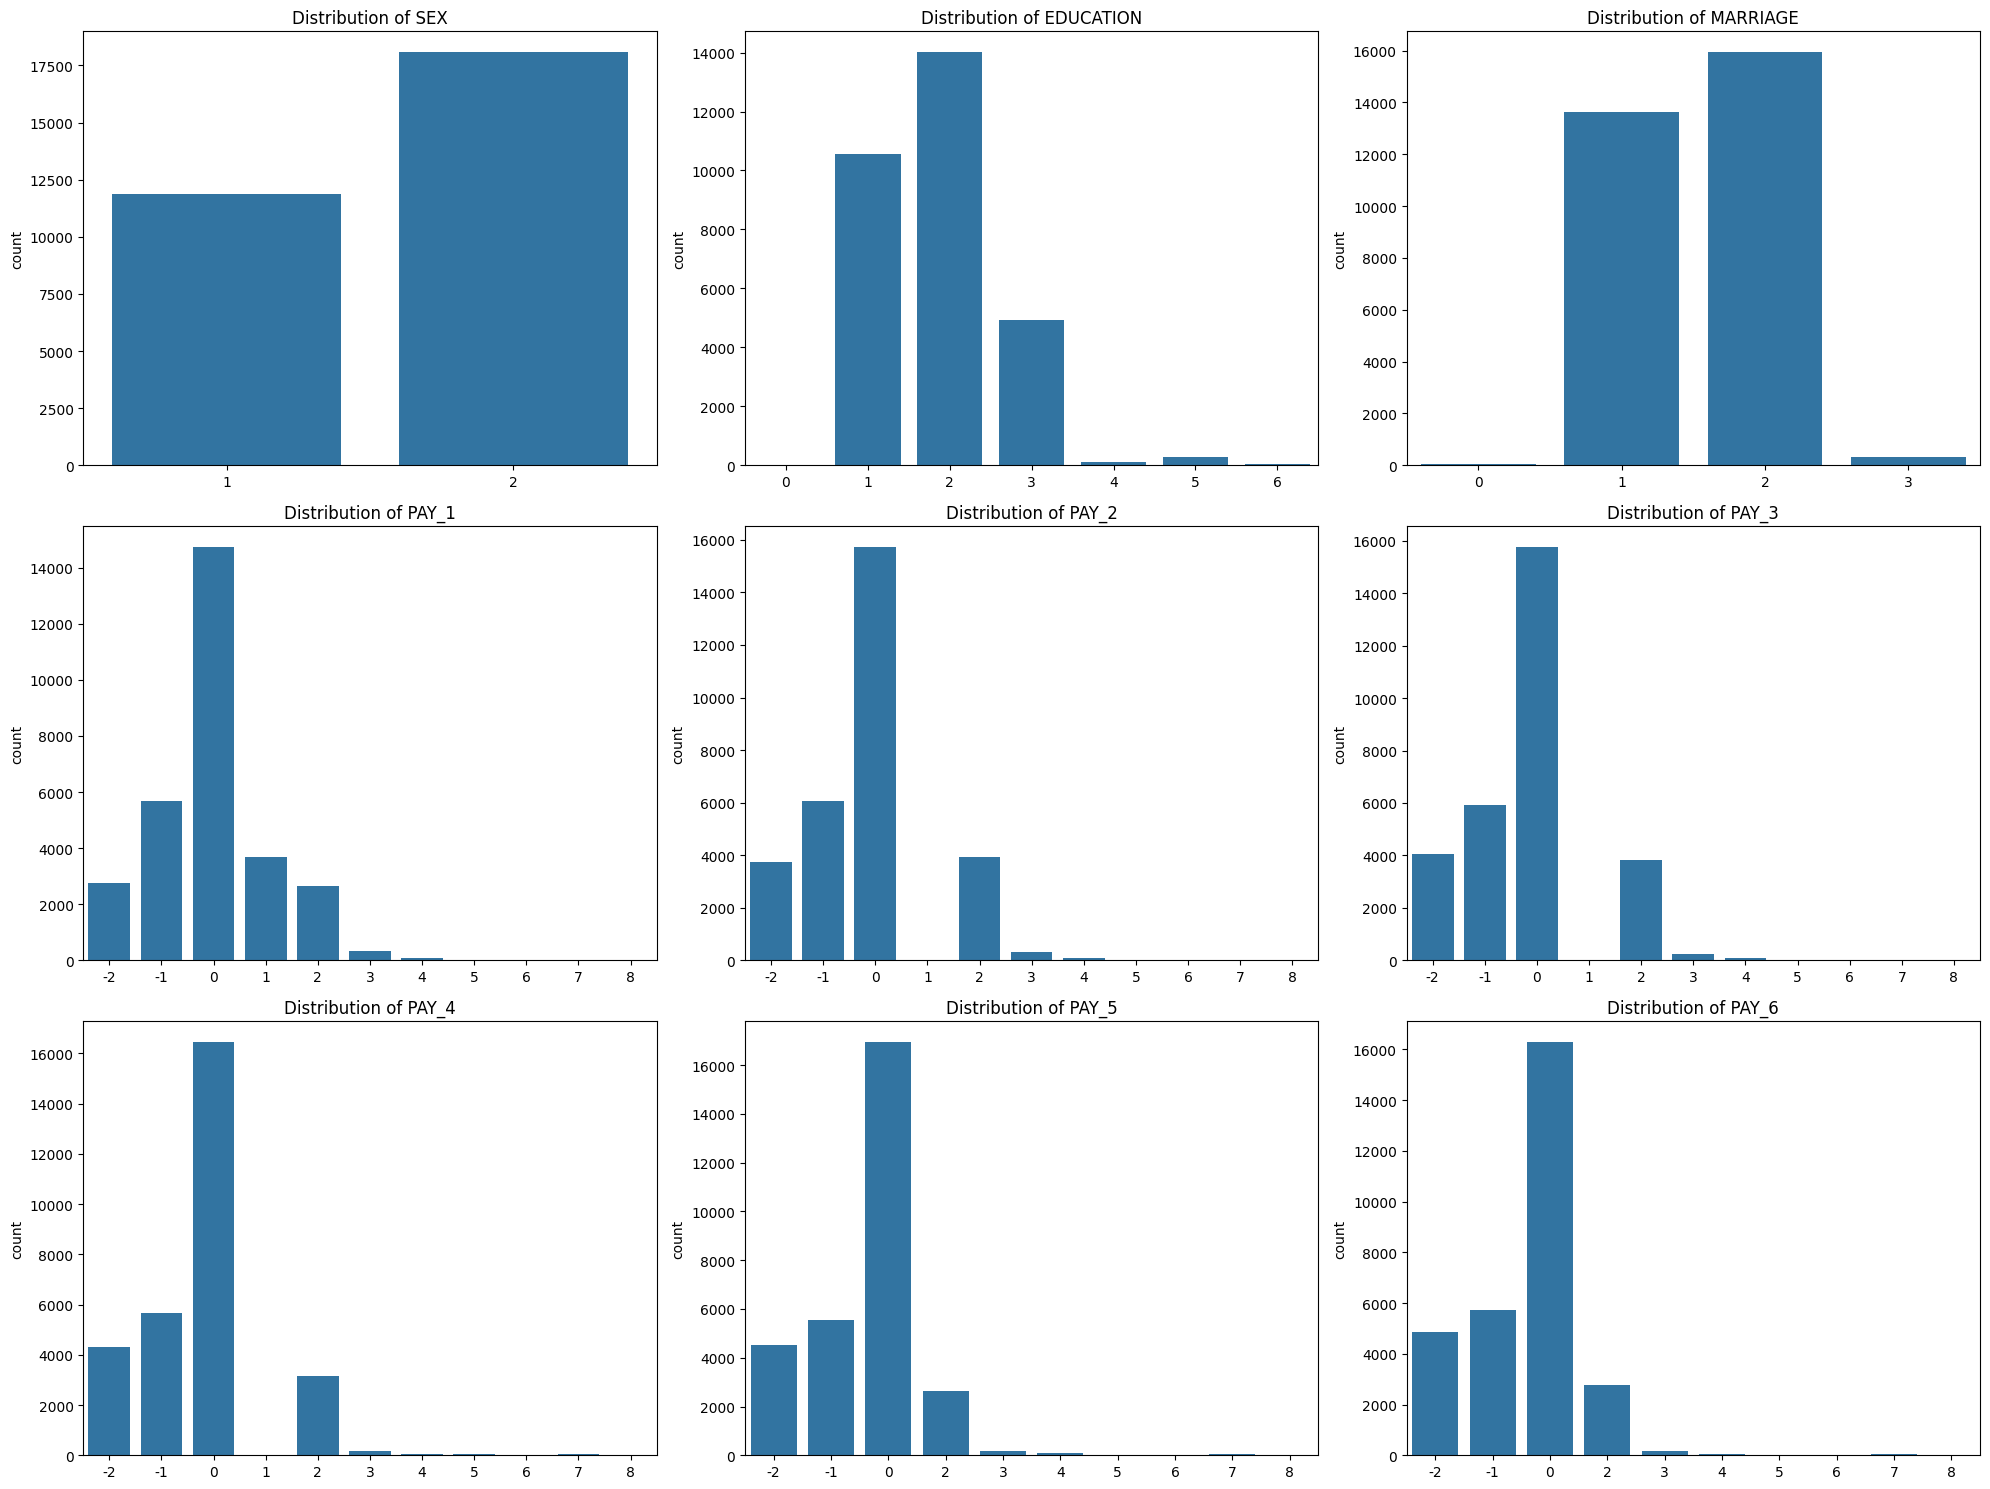

In [ ]:
# Creating the "canva", 20 inches in width and 15 inches in height -> Large graph
plt.figure(figsize = (20,15))
for i, col in enumerate(categories,1):
    plt.subplot(3,3,i) # Creat a 3x3 grid (actually the number of cat-attr is conveniently 9, 3x3 is perfect), the number i denote the position in the grid
    sns.countplot(x=col, data = df)
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
# Make sure that there is no overlaps
plt.tight_layout()
plt.show()

From the graphs we can see that the distribution is somewhat inconsistent with the description:
- `MARRIAGE`: There are values of `0`, it makes no sense. Maybe we should merge it with values `3` (Others)
- `PAY_1` to `PAY_6`: `-2` and `0` are not recorded in the description, yet appeared in the graphs. Those values are actually meaningful in practice:
`2` is for `no_consumption` and `0` is for `revolving credit but minimum paid`. So we will keep those values.